WIP: Assim que estiver tudo certo com o código, nós fazemos os gráficos aqui

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Comparação Analítica

Aproximado (sem otimização)  vs U2 original $4*(\eta+m)^2 -12(\eta+m)+10$, aproximado: $4*(\eta-2)^2+2*(\eta-2)*(16*m-8)$

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


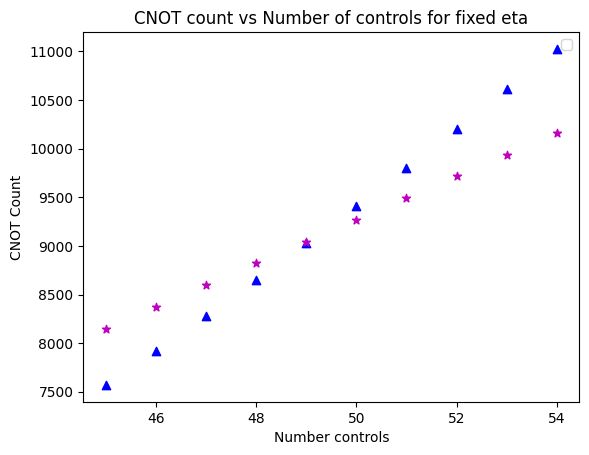

In [14]:
def custo_og(eta, m):
    return 4*(eta+m)**2 -12*(eta+m)+10
#def custo_approx(eta,m):
#    return 4*eta**2-32*eta+48+32*(eta-2)*m
    #return res
def custo_approx(eta,m):
    return 4*(eta-2)**2+2*(eta-2)*(16*m-8)


n_base=9
#x = list(range(0, 100,1))
x = list(range(45, 55,1))
analitico_approx_z_plot = [custo_approx(n_base, xi-n_base) for xi in x] 
analitico_original_z_plot = [custo_og(n_base, xi-n_base) for xi in x] 

# Plot the data as a line plot
plt.rcParams["figure.figsize"] = (7.2, 4.0)
plt.scatter(x, analitico_original_z_plot, c="b", marker='^')
plt.scatter(x, analitico_approx_z_plot, c="m", marker='*')

plt.legend(
    ('Original method', 'Approximated method',),
    loc='upper left', shadow=False
)

# Add labels to the axes and a title to the graph
plt.xlabel('Number controls')
plt.ylabel('CNOT Count')
plt.title('CNOT count vs Number of controls for fixed eta')

# Display the graph
plt.legend()
plt.show()

Comparando SU(2) em cascata vs multiplos SU(2)

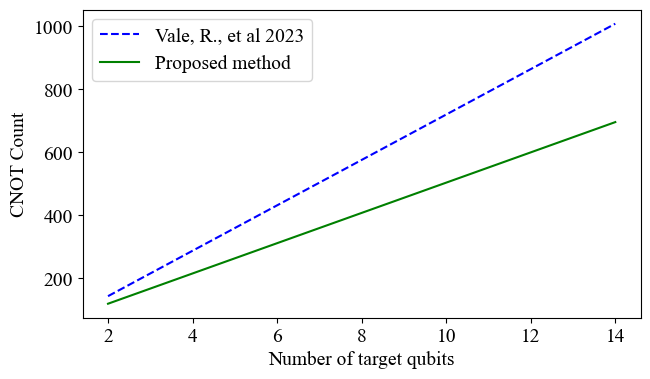

In [9]:
def su2_og(k, p):
    return p*(16*(k+1)-40)

def su2_cascata(k,p):
    return 16*(k+1)-40+48*(p-1)


#k controls and p targets
p = list(range(2, 15))
#n_qubits = ancilla+target+controls>=8, ccontrols>=6 é o mínimo de controles que precisamos
k = 6
su2_original_z_plot = [su2_og(k, pi) for pi in p] 
su2_cascata_z_plot = [su2_cascata(k, pi) for pi in p] 

# Plot the data as a line plot
plt.rcParams["figure.figsize"] = (7.2, 4.0)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 14})

plt.plot(p, su2_original_z_plot, 'b--')
plt.plot(p, su2_cascata_z_plot, 'g-')

plt.legend(
    ('Vale, R., et al 2023', 'Proposed method',),
    loc='upper left', shadow=False
)

# Add labels to the axes and a title to the graph
plt.xlabel('Number of target qubits')
plt.ylabel('CNOT Count')
#plt.title('CNOT count vs Number of target qubits')

# Display the graph
#plt.savefig("m-su2 original vs cascade.jpg", format="jpg", dpi=300)
plt.savefig("m-su2 original vs cascade.svg", dpi=600, bbox_inches='tight')
plt.show()


U2 Aproximado e otimizado

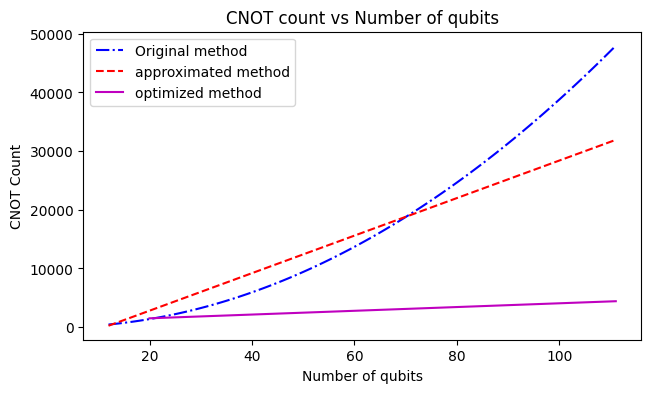

In [5]:
def custo_og(eta, m):
    return 4*(eta+m)**2 -12*(eta+m)+10

def custo_approx(eta,m):
    return 4*(eta-2)**2+2*(eta-2)*(16*m-8)

def custo_otimizado(eta, m):
    return 4*(eta-2)**2 + 64*eta - 304 + 32*(eta + m)

n_base=12
# x = list(range(0, 100,1))
x = list(range(n_base, n_base+100, 1))
x_t3 = list(range(n_base+8, n_base+100, 1))
analitico_approx_z_plot = [custo_approx(n_base, xi-n_base) for xi in x] 
analitico_original_z_plot = [custo_og(n_base, xi-n_base) for xi in x] 
analitico_otimizado_z_plot = [custo_otimizado(n_base, xi-n_base) for xi in x_t3]

# Plot the data as a line plot
plt.rcParams["figure.figsize"] = (7.2, 4.0)
plt.plot(x, analitico_original_z_plot, 'b-.')
plt.plot(x, analitico_approx_z_plot, 'r--')
plt.plot(x_t3, analitico_otimizado_z_plot, 'm-')


plt.legend(
    ('Original method', 'approximated method', 'optimized method'),
    loc='upper left', shadow=False
)

# Add labels to the axes and a title to the graph
plt.xlabel('Number of qubits')
plt.ylabel('CNOT Count')
plt.title('CNOT count vs Number of qubits')

# Display the graph

plt.savefig("u2_optim_comparison_analytic.svg", dpi=600, bbox_inches='tight')
# plt.savefig("u2_optim_comparison_analytic.jpg", format="svg", dpi=600)

plt.show()


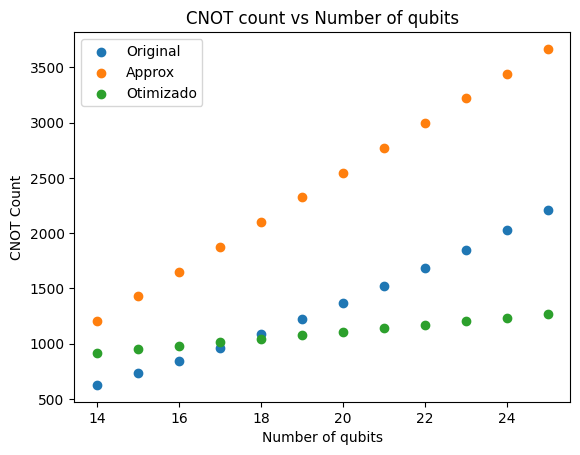

In [26]:
n_base=9
#x = list(range(0, 100,1))
x = list(range(n_base+5, 26,1))
analitico_approx_z_plot = [custo_approx(n_base, xi-n_base) for xi in x] 
analitico_original_z_plot = [custo_og(n_base, xi-n_base) for xi in x] 
analitico_otimizado_z_plot = [custo_otimizado(n_base, xi-n_base) for xi in x] 

# Plot the data as a line plot
plt.scatter(x, analitico_original_z_plot, label = "Original")
plt.scatter(x, analitico_approx_z_plot, label = "Approx")
plt.scatter(x, analitico_otimizado_z_plot, label = "Otimizado")

# Add labels to the axes and a title to the graph
plt.xlabel('Number of qubits')
plt.ylabel('CNOT Count')
plt.title('CNOT count vs Number of qubits')

# Display the graph
plt.legend()
plt.savefig("u2_optim_comparison_analytic_small_n.jpg", format="jpg", dpi=300)
plt.show()